<h1> Dimensionality Reduction: Introduction </h1>


<h2> Project Proposal </h2>


The objective of this project is to reduce the tabular data's dimensionality, breaking down the range of disparate values into vectors which combine the meaninfgul signal contained in the data sources I have aggregated. This can enable faster processing of the data in other analyses such as decision trees or regression models, and it will also enable better performance by excluding noise from the data where possible. In terms of tools: I will use Python's scikit learn and its sub-package scikit learn.metrics, particularly the PCA and tSNE methods, to analyze the data and attempt dimensionality reduction. 

The record dataset I will be analyzing for dimensionality reduction includes: 1 - The daily level of retail activity for the top 10 most active stock tickers, 2 - The daily change in the level of retail activity for the top 10 most active stock tickers, 3 - Weekly individual investor survey data (columns for the percent of respondents that were bearish, bullish, or neutral), 4 - Weekly change in major stock indices prices, 4 - weekly stocktwits rankings of the most active stock tickers.

The dataset described above was selected by using all of the available record data that I gathered for this project. This is because data pertaining to retail investor sentiment and trading is exceptionally scarce online, and so it makes sense to use all available data for topics such as dimensionality reduction. Text data was not used due to its fundamental differences from the record data, and computational requirements given the 10,000 columns.


<h1> Code Implementation: </h1>


In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import seaborn as sns


import os
os.getcwd()



'c:\\Users\\corwi\\Documents\\dsan-5000-project-corwindark\\dsan-website\\5000-website\\dimreduction'

In [5]:
# Read data in:
tabData = pd.read_csv("../data/01-modified-data/joinedSentiment.csv") 
tabData.shape

(9560, 23)

In [50]:
# Prep data for PCA and T-SME
nonNumericColumns = ['X', "Unnamed: 0", 'week.y', 'lagweek', 'sentiment',  'date.x', 'Total', 'X8.week', 'date.x', 'ticker', 'date.y', 'deltaSentiment',  'week.x', 'weekyear', 'newEntry']

x = tabData.drop(columns = nonNumericColumns)
x = x.dropna()

xsave = x

x = x.drop(columns = ['deltaActivity'])

x.SPYCloseWK = x.SPYCloseWK.apply(lambda x: float(x.replace(",", "") ))
x.SPYHighWk = x.SPYHighWk.apply(lambda x: float(x.replace(",", "") ))
x.SPYLowWK = x.SPYLowWK.apply(lambda x: float(x.replace(",", "") ))


In [21]:
# Implement PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(x)
print('\nPCA')
print(pca.components_)

print(pca.explained_variance_ratio_ * 100)


PCA
[[-1.68248660e-06 -9.38301381e-06 -2.92182977e-05  3.85961909e-05
  -4.79948736e-05 -5.59590301e-01 -5.97065315e-01 -5.74779697e-01]
 [ 1.02733629e-05 -6.50141479e-04 -2.83986205e-04  9.34058655e-04
  -1.58436440e-03  7.83508069e-01 -6.07178267e-01 -1.32082442e-01]
 [-3.33404703e-06 -4.95640335e-05 -6.83867804e-05  1.18117062e-04
  -1.67786032e-04 -2.70132741e-01 -5.24257322e-01  8.07578178e-01]]
[99.45726907  0.34201376  0.20071211]


In [29]:
# Given that the first component explains so much of the variance, let's do PCA with only 2 components
pca = PCA(n_components=2)
pca.fit(x)
print('\nPCA')
print(pca.components_)

xpca = pca.fit_transform(x)

print(pca.explained_variance_ratio_ * 100)


PCA
[[-1.68248660e-06 -9.38301381e-06 -2.92182977e-05  3.85961909e-05
  -4.79948736e-05 -5.59590301e-01 -5.97065315e-01 -5.74779697e-01]
 [ 1.02733629e-05 -6.50141479e-04 -2.83986205e-04  9.34058655e-04
  -1.58436440e-03  7.83508069e-01 -6.07178267e-01 -1.32082442e-01]]
[99.45726907  0.34201376]


In [46]:
# Implement TSNE
from sklearn.manifold import TSNE

#xt = x.drop_duplicates()
tsne = TSNE(n_components=3, random_state=21)
X_tsne = tsne.fit_transform(x)
tsne.kl_divergence_




-4.008790016174316

In [32]:
# Parameter tuning for TSNE
kl_divergences =  []  
# first val is perplexity, second is KL divergence

for i in range(1,10):
    print(i)
    tsne = TSNE(n_components=2, perplexity= i, random_state=21)
    X_tsne = tsne.fit_transform(x)
    kl = tsne.kl_divergence_
    kl_divergences.append([ [i], [kl] ])

print(kl_divergences)


1
2
3
4
5
6
7
8
9
[[[1], [-0.40658706426620483]], [[2], [-0.4820026159286499]], [[3], [-0.505386471748352]], [[4], [-0.7875299453735352]], [[5], [-0.9650571346282959]], [[6], [-1.0686755180358887]], [[7], [-1.1880613565444946]], [[8], [-1.2203705310821533]], [[9], [-1.407416820526123]]]


<Axes: xlabel='Perplexity', ylabel='KL_Divergence'>

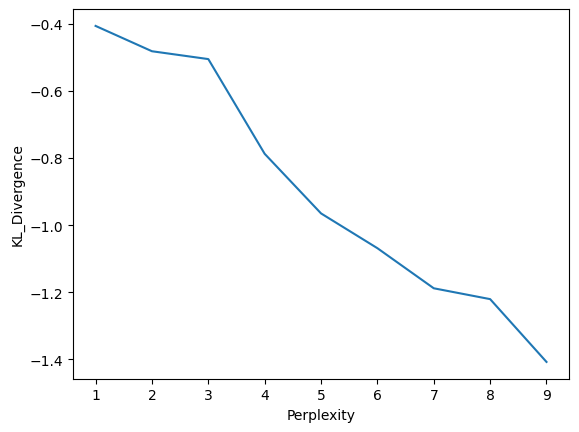

In [82]:
kls = pd.DataFrame(kl_divergences)
#print(kls.shape)
kls.columns = ['Perplexity', 'KL_Divergence']
#print(kls.head())
kls.Perplexity = kls.Perplexity.apply(lambda x: x[0])
kls.KL_Divergence = kls.KL_Divergence.apply(lambda x: x[0])

#print(kls.head())
#kls = pd.DataFrame(kl_divergences, columns = ['Perplexity', 'KL_Divergence']) 
sns.lineplot(kls, x = 'Perplexity', y = 'KL_Divergence') 


From looking at the plot of perplexity versus KL divergence, it appears that the lower values of perplexity performed better and yielded a KL divergence closer to 0. As such, I would use perplexity = 1 for this model.

<h1> Project Report </h1>

Let's start with the results of the principle component analysis:

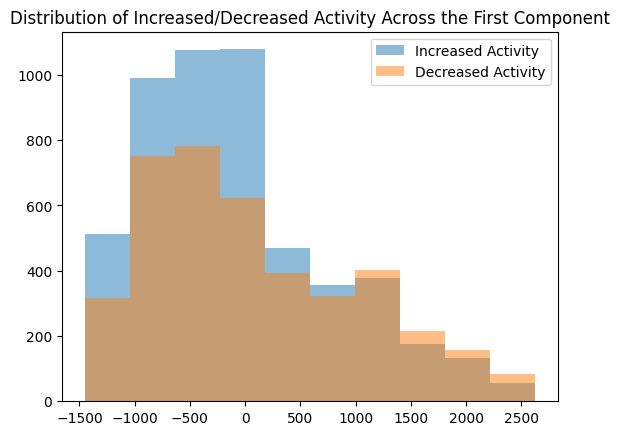

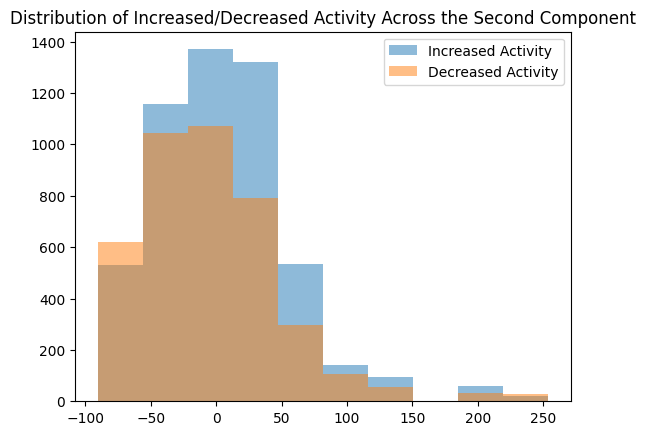

In [74]:
increaseActivity = (xsave['deltaActivity'] > 0)
increaseActivity.head()

#plt.hist(xpca[:,0], hue=increaseActivity)
#plt.show()



plt.hist(xpca[increaseActivity,0],  
         alpha=0.5, # the transaparency parameter 
         label='Increased Activity') 
  
plt.hist(xpca[~(increaseActivity),0],  
         alpha=0.5, # the transaparency parameter 
         label='Decreased Activity') 
plt.title("Distribution of Increased/Decreased Activity Across the First Component")
plt.legend()
plt.show()


plt.hist(xpca[increaseActivity,1],  
         alpha=0.5, # the transaparency parameter 
         label='Increased Activity') 
  
plt.hist(xpca[~(increaseActivity),1],  
         alpha=0.5, # the transaparency parameter 
         label='Decreased Activity') 

plt.title("Distribution of Increased/Decreased Activity Across the Second Component")
plt.legend()
plt.show()


In [75]:
from scipy import stats


stats.ttest_ind(xpca[increaseActivity,1], xpca[~(increaseActivity),1] )

TtestResult(statistic=8.74005373734051, pvalue=2.7359772711526402e-18, df=9268.0)

As seen above, the PCA method produces principle components which are somewhat good at splitting our data into the classes we care about. There is a noticeable difference between the classes in the first principle component especially, where higher values had more decreases in activity, and lower values had less. This should be enough on its own to outperform a simple random classifier. Indeed, a T-Test where the two samples are the two possible values of the outcome variable (increase/decrease), and the means were of the values of the first principle component foe each ovservation, returned a p value close to zero. This demonstrates the statistically significant difference along this axes. 

Interestingly, of the 8 variables included in the tabular data, the first axis had negative coefficients for seven of them. This is particularly surprising because the first principle component also explained so much of the variation in the data at >95%. However, I believe the reason for this became apparent on further investigation: All 7 features that shared negative coefficients were in some way related to positive sentiment or exciment around a stock's value. The closing value of the S&P 500, the positive sentiment in investor surveys, and the number of reddit comments all relate to investors being excited about the stock in particular or the market in general. In contrast, the one positive coefficient was for the investors who responded with negative sentiment in the survey, and predictably a higher value in the first component was tied with a greater likelihood of retail investor activity decreases. 

In contrast, TSNE's reduced dimensions had little interpretable meaning.

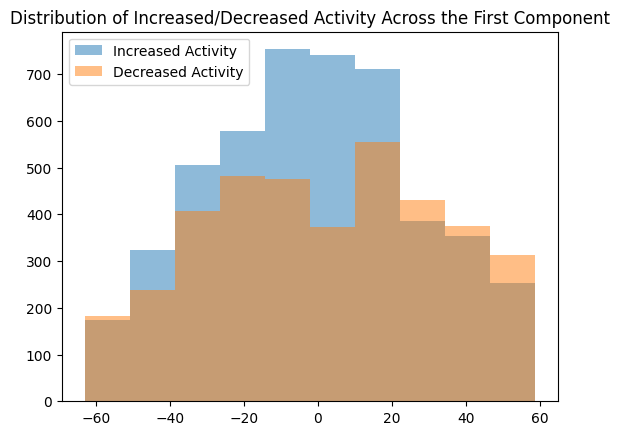

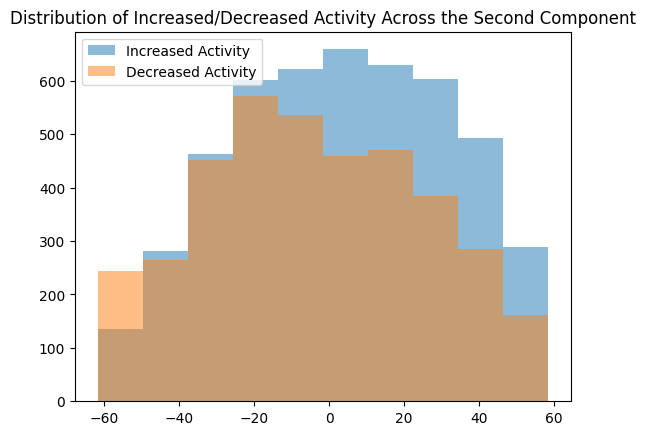

In [86]:
increaseActivity = (xsave['deltaActivity'] > 0)
increaseActivity.head()

increaseActivity = increaseActivity[0:X_tsne.shape[0]]
#plt.hist(xpca[:,0], hue=increaseActivity)
#plt.show()


plt.hist(X_tsne[increaseActivity,0],  
         alpha=0.5, # the transaparency parameter 
         label='Increased Activity') 
  
plt.hist(X_tsne[~(increaseActivity),0],  
         alpha=0.5, # the transaparency parameter 
         label='Decreased Activity') 
plt.title("Distribution of Increased/Decreased Activity Across the First Component")
plt.legend()
plt.show()


plt.hist(X_tsne[increaseActivity,1],  
         alpha=0.5, # the transaparency parameter 
         label='Increased Activity') 
  
plt.hist(X_tsne[~(increaseActivity),1],  
         alpha=0.5, # the transaparency parameter 
         label='Decreased Activity') 

plt.title("Distribution of Increased/Decreased Activity Across the Second Component")
plt.legend()
plt.show()


While the TSNE result did not produce a dimension that separated the the outcome variable as cleanly as PCA, it did create distributions along the new dimensions that were far more normal and less skewed in a particular dimension. Compared to the PCA dimensions that had clear skew, the TSNE distributions were symmetrical.

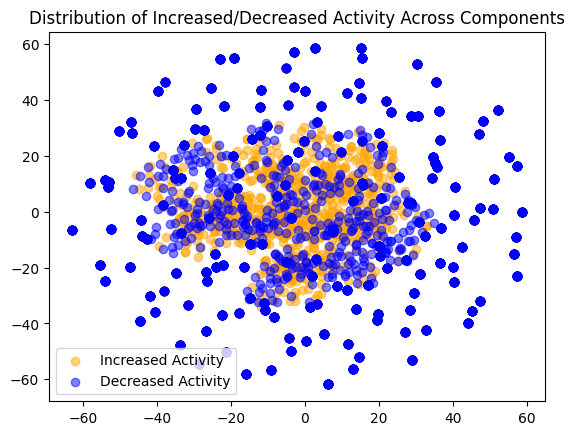

In [92]:
plt.scatter( x= X_tsne[increaseActivity,0], y = X_tsne[increaseActivity,1],
         alpha=0.5, # the transaparency parameter
         color = "Orange", 
         label='Increased Activity') 
  
plt.scatter( x= X_tsne[~(increaseActivity),0], y = X_tsne[~(increaseActivity),1],
         alpha=0.5, # the transaparency parameter
         color = "blue", 
         label='Decreased Activity') 
  

  
plt.title("Distribution of Increased/Decreased Activity Across Components")
plt.legend()
plt.show()

With regard to the components themselves, a visualization shows how the selected perplexity of one has created a cluster with a dense center and sparse exterior. Coloring the points by whether there was an increase in retail trader activity, we do not see much patter, as the two distributions are intertwined. However, we can also see that the distribution of both new dimensions is clearly normal, as identified earlier when reviewing the two dimensions individually.

<h1> Comparing and Contrasting PCA and TSNE </h1>

Between the two methods, I believe that PCA has produced a more useful result for my research question. Because PCA expresses the new dimension as a linear combination of the input features, I was able to identify a novel relationship in the data. In particular, this relationship was that the negative sentiment aspect of the investor survey was an oppositely-valenced feature from the others in my tabular dataset. The PCA model was easy to fit overall, and the elbow plot clearly showed that the majority of variance in the data was explained by just one principle component (~95%), with a second component being the maximum I would consider. This made it a relatively easy choice to chose 2 components for PCA, but after visualizing both of them I believe the second could perhaps be considered spurious in the future. 

For TSNE, I found the method useful for visualizing my data in only two dimensions, after having 8 dimensions to begin with. The resulting distributions were not skewed and were easy to cross-reference with my outcome variable. Plotting the perplexity values vs. the KL Divergence score of the models showed that as perplexity increased, KL Divergence got further from 0. This also made hyperparameter selection a relatively easy choice, as I was able to conclude that the lowest perplexity score was also the best one in terms of KL divergence performance. As visualized above, this did not lead to the most meaninfgul conclusions, but the approach was an interesting contrast with PCA none the less.

In conclusion, I think that when visualization is required T-SNE is a better choice, but when you need to understand linear relationships between your variables, PCA is a better choice, as evidenced by what each method produced for my dataset.